## Evaluating complete dataset (March 2020 - December 2020/Jan 1 2021)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transformar_features = False
data_2020 = pd.read_csv('./data_input_zerofill_2020.csv', delimiter=';')
data_2018 = pd.read_csv('./data_input_zerofill_2018.csv')
data_2015 = pd.read_csv('./data_input_zerofill_2015.csv', delimiter=';')

busline_filter = 41
# data_model = data.loc[data['linha'] == busline_filter]
# display(data_model)

In [2]:
data_2020

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes
0,1,2020-03-01 00:00:00,0,6,0.000000,1.000000,0,1,61,3,1
1,1,2020-03-01 01:00:00,0,6,0.269797,0.962917,1,1,61,3,1
2,1,2020-03-01 02:00:00,0,6,0.519584,0.854419,2,1,61,3,1
3,1,2020-03-01 03:00:00,0,6,0.730836,0.682553,3,1,61,3,1
4,1,2020-03-01 04:00:00,0,6,0.887885,0.460065,4,1,61,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1604349,999,2020-12-01 08:00:00,12,1,0.816970,-0.576680,8,1,336,12,0
1604350,999,2020-12-01 09:00:00,1,1,0.631088,-0.775711,9,1,336,12,0
1604351,999,2020-12-01 10:00:00,1,1,0.398401,-0.917211,10,1,336,12,0
1604352,999,2020-12-01 11:00:00,5,1,0.136167,-0.990686,11,1,336,12,0


In [3]:
data_2018

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes
0,1,2020-01-11 02:00:00,0,5,5.195840e-01,0.854419,2,11,11,1,2
1,1,2020-01-31 03:00:00,0,4,7.308360e-01,0.682553,3,31,31,1,5
2,1,2020-02-02 03:00:00,0,6,7.308360e-01,0.682553,3,2,33,2,1
3,1,2020-02-19 02:00:00,0,2,5.195840e-01,0.854419,2,19,50,2,4
4,1,2020-02-20 02:00:00,0,3,5.195840e-01,0.854419,2,20,51,2,4
...,...,...,...,...,...,...,...,...,...,...,...
1229961,999,2018-07-02 21:00:00,5,0,-5.195840e-01,0.854419,21,2,183,7,1
1229962,999,2018-07-02 22:00:00,8,0,-2.697968e-01,0.962917,22,2,183,7,1
1229963,999,2018-07-02 23:00:00,1,0,-2.449294e-16,1.000000,23,2,183,7,1
1229964,999,2018-07-30 20:00:00,2,0,-7.308360e-01,0.682553,20,30,211,7,5


In [4]:
data_2015

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes
0,1,2015-01-15 02:00:00,0,3,0.519584,0.854419,2,15,15,1,3
1,1,2015-01-25 02:00:00,0,6,0.519584,0.854419,2,25,25,1,4
2,1,2015-01-25 06:00:00,0,6,0.997669,-0.068242,6,25,25,1,4
3,1,2015-01-25 07:00:00,0,6,0.942261,-0.334880,7,25,25,1,4
4,1,2015-01-25 08:00:00,0,6,0.816970,-0.576680,8,25,25,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2081985,999,2015-12-05 09:00:00,18,5,0.631088,-0.775711,9,5,339,12,0
2081986,999,2015-12-05 10:00:00,64,5,0.398401,-0.917211,10,5,339,12,0
2081987,999,2015-12-05 11:00:00,8,5,0.136167,-0.990686,11,5,339,12,0
2081988,999,2015-12-05 12:00:00,43,5,-0.136167,-0.990686,12,5,339,12,0


In [5]:
top100_linhas_2020 = data_2020.groupby(data_2020.linha).sum().reset_index().sort_values('validations_per_hour', ascending=False).index[:100].to_list()
print(top100_linhas_2020)

top100_linhas_2018 = data_2018.groupby(data_2018.linha).sum().reset_index().sort_values('validations_per_hour', ascending=False).index[:100].to_list()
print(top100_linhas_2018)

top100_linhas_2015 = data_2015.groupby(data_2015.linha).sum().reset_index().sort_values('validations_per_hour', ascending=False).index[:100].to_list()
print(top100_linhas_2015)

[1, 38, 47, 48, 39, 72, 333, 42, 7, 0, 41, 367, 23, 341, 35, 307, 4, 337, 70, 199, 27, 25, 73, 46, 339, 26, 327, 88, 354, 226, 6, 340, 245, 71, 318, 374, 24, 29, 250, 28, 76, 69, 334, 62, 261, 66, 257, 302, 21, 137, 49, 135, 162, 330, 204, 5, 94, 348, 95, 12, 382, 258, 349, 231, 282, 264, 102, 168, 148, 246, 128, 319, 332, 3, 263, 190, 67, 130, 82, 75, 78, 103, 40, 215, 335, 356, 64, 180, 217, 127, 80, 221, 164, 361, 56, 219, 100, 195, 158, 123]
[1, 37, 38, 41, 46, 20, 71, 307, 47, 69, 70, 40, 350, 26, 45, 34, 24, 286, 72, 0, 301, 87, 22, 181, 25, 122, 317, 23, 68, 61, 81, 315, 28, 95, 27, 94, 313, 225, 75, 65, 4, 185, 355, 120, 230, 7, 340, 306, 9, 240, 102, 8, 281, 293, 170, 168, 226, 341, 12, 77, 308, 83, 48, 74, 237, 66, 361, 304, 224, 109, 172, 113, 103, 100, 357, 334, 316, 335, 342, 55, 115, 39, 143, 221, 149, 233, 336, 112, 262, 354, 202, 162, 346, 242, 67, 145, 196, 352, 243, 80]
[37, 41, 1, 38, 47, 48, 20, 72, 22, 40, 70, 71, 26, 24, 73, 283, 46, 25, 69, 34, 303, 0, 88, 183, 8

In [6]:
print('Quantidade de Linhas de Onibus 2020: ', len(data_2020.linha.unique()))
print('Quantidade de Linhas de Onibus 2018: ', len(data_2018.linha.unique()))
print('Quantidade de Linhas de Onibus 2015: ', len(data_2015.linha.unique()))
# data

Quantidade de Linhas de Onibus 2020:  404
Quantidade de Linhas de Onibus 2018:  390
Quantidade de Linhas de Onibus 2015:  396


## Sazonalidade Anual / Dia

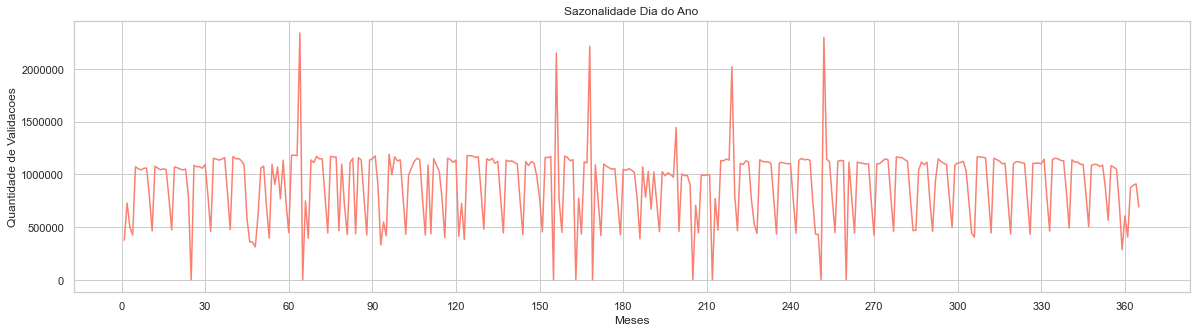

In [64]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20,5))
plt.title("Sazonalidade Dia do Ano")
sns.set_theme(style="whitegrid")
plt.ticklabel_format(style = 'plain')
ax = sns.lineplot(x="d_ano", y="validations_per_hour", data=data_2015.groupby(['d_ano']).sum().reset_index(), color='salmon')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('Meses')
plt.ylabel('Quantidade de Validacoes')
plt.savefig('./images/sazonalidade_d_ano.pdf')
plt.show()

## Relacao QTD de validacoes Mensais

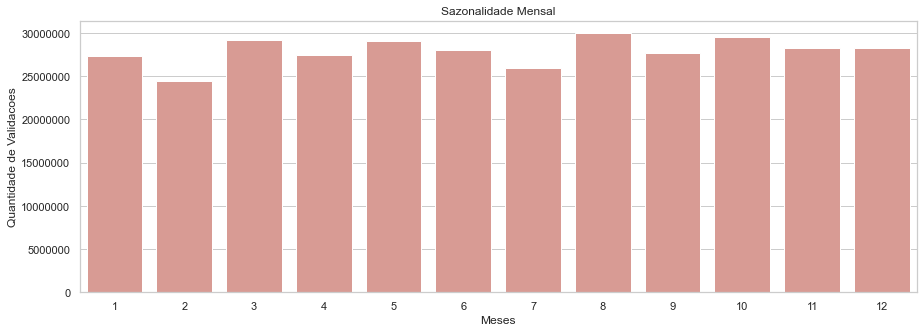

In [66]:
plt.figure(figsize=(15,5))
plt.title("Sazonalidade Mensal")
sns.set_theme(style="whitegrid")
plt.ticklabel_format(style = 'plain')
sns.barplot(x="mes", y="validations_per_hour", data=data_2015.groupby(['mes']).sum().reset_index(), color='salmon', saturation=.5)
plt.xlabel('Meses')
plt.ylabel('Quantidade de Validacoes')
plt.savefig('./images/sazonalidade_mensal.pdf')
plt.show()

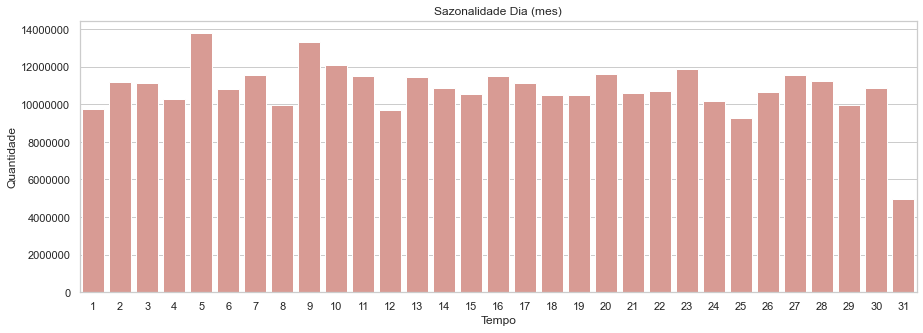

In [48]:

plt.figure(figsize=(15,5))
plt.title("Sazonalidade Dia (mes)")
plt.ticklabel_format(style = 'plain')
sns.barplot(x="d_mes", y="validations_per_hour", data=data_2015.groupby(['d_mes']).sum().reset_index(), color="salmon", saturation=.5, ci=None)
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.savefig('./images/sazonalidade_dia_mes.pdf')
plt.show()

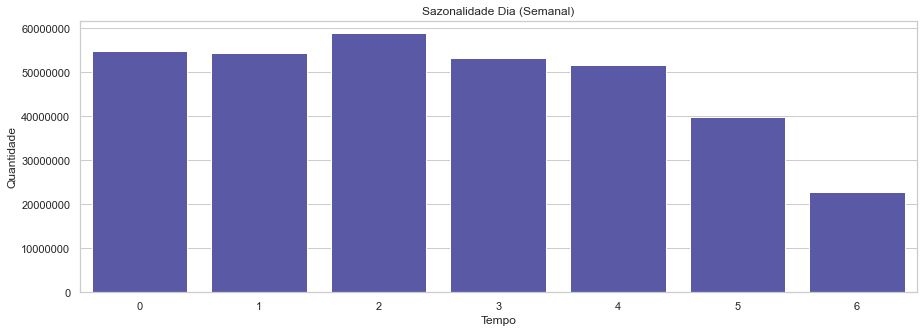

In [50]:
plt.figure(figsize=(15,5))
plt.ticklabel_format(style = 'plain')
plt.title("Sazonalidade Dia (Semanal)")
sns.barplot(x='d_semana', y='validations_per_hour', data=data_2015.groupby(['d_semana']).sum().reset_index(), color="blue", saturation=.3, ci=None)
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.savefig('./images/sazonalidade_dia_semana.pdf')
plt.show()

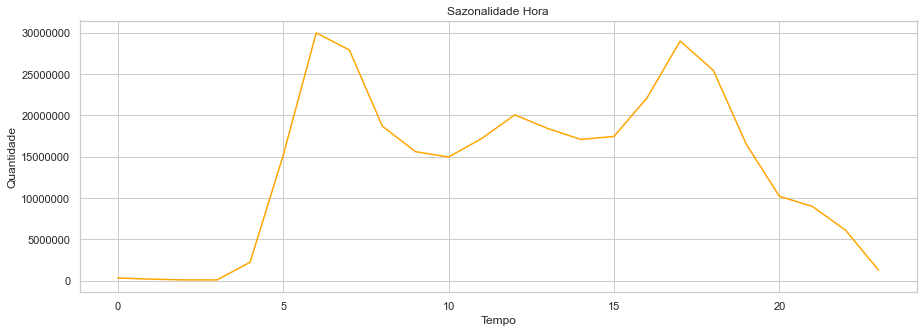

In [57]:
plt.figure(figsize=(15,5))
plt.ticklabel_format(style = 'plain')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.groupby(['hora']).sum().reset_index(), color="orange", ci=None)
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.savefig('./images/sazonalidade_hora.pdf')
plt.show()

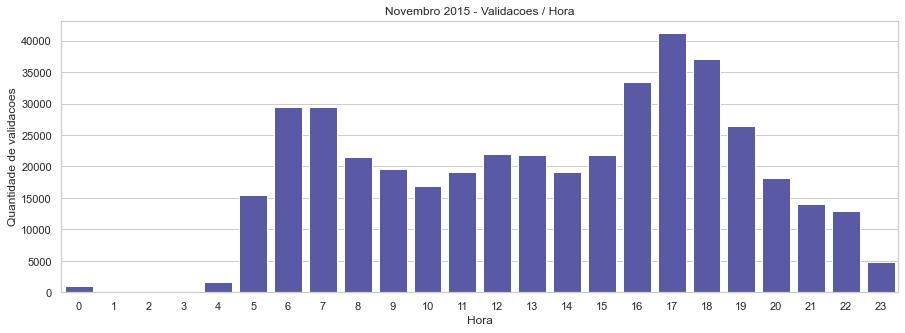

In [56]:
plt.figure(figsize=(15,5))
plt.title("Novembro 2015 - Validacoes / Hora")
p = sns.barplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.mes == 11].loc[data_2015.linha == 41].groupby([ 'hora']).sum().reset_index(), color="blue", saturation=.3, ci=None)
plt.xlabel('Hora')
plt.ylabel('Quantidade de validacoes')
plt.savefig('./images/sazonalidade_nov_2015.pdf')
plt.show()

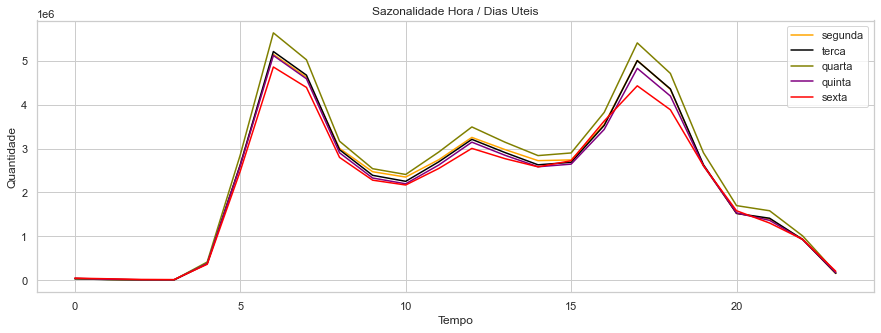

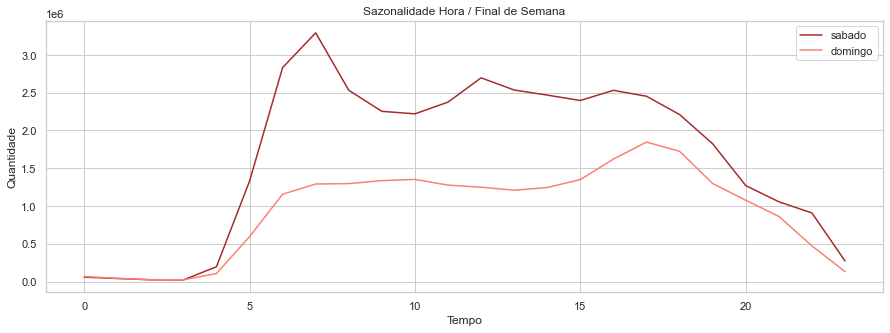

In [59]:
colors = ['orange', 'red', 'black', 'green', 'purple', 'olive', 'cyan']

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora / Dias Uteis")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.d_semana == 0].groupby([ 'hora']).sum().reset_index(), ci=None, color='orange', label='segunda')
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.d_semana == 1].groupby([ 'hora']).sum().reset_index(), ci=None, color='black', label='terca')
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.d_semana == 2].groupby([ 'hora']).sum().reset_index(), ci=None, color='olive', label='quarta')
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.d_semana == 3].groupby([ 'hora']).sum().reset_index(), ci=None, color='purple', label='quinta')
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.d_semana == 4].groupby([ 'hora']).sum().reset_index(), ci=None, color='red', label='sexta')
plt.savefig(f'./images/sazonalidade_hora_diadasemana_diasuteis.pdf')
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora / Final de Semana")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.d_semana == 5].groupby([ 'hora']).sum().reset_index(), ci=None, color='brown', label='sabado')
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015.loc[data_2015.d_semana == 6].groupby([ 'hora']).sum().reset_index(), ci=None, color='salmon', label='domingo')
plt.savefig(f'./images/sazonalidade_hora_diadasemana_fds.pdf')
plt.show()

## Visualizacao das Linhas

### Ranking (top 10 / 100)
Ranking feito atraves do comparativo entre os 
modelos mais performaticos analisados: (exemplo abaixo feito sob a linha 41)  
- Stacking Regressors  
- RandomForest GridSearched  
- RandomForest Default  
- RandomForest Bagging  
- GradientBoostingRegressor  
- LinearRegression Bagging  
- LinearReg GridSearched  
- LinearReg Default  

In [10]:
data = pd.read_csv('./performances/ranking_top100.csv', sep=',', delimiter=',')
ranking = data.sort_values('MAE', ascending=True).drop_duplicates(subset=['Linha'])
ranking.head(10)

,Linha,R2,RMSE,MAE
0,325,0.855805,6.237197,3.708476
3,384,0.876705,6.257836,3.903380
8,332,0.819357,7.037291,4.299338
12,619,0.831069,6.610710,4.441423
16,641,0.804414,7.701158,4.666211
20,630,0.902611,8.925873,5.000876
21,304,0.872795,8.485959,5.060620
26,339,0.845717,8.890747,5.270951
28,225,0.847308,10.315144,5.313097
35,356,0.900404,9.234865,5.510715


In [11]:
data_m = pd.read_csv('./data_input_zerofill.csv', sep=';', delimiter=';')

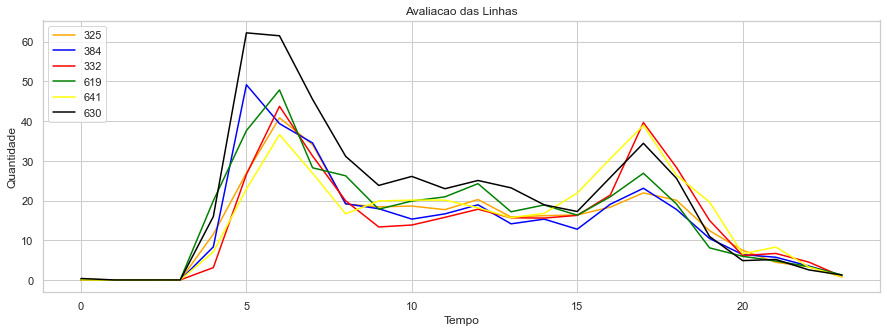

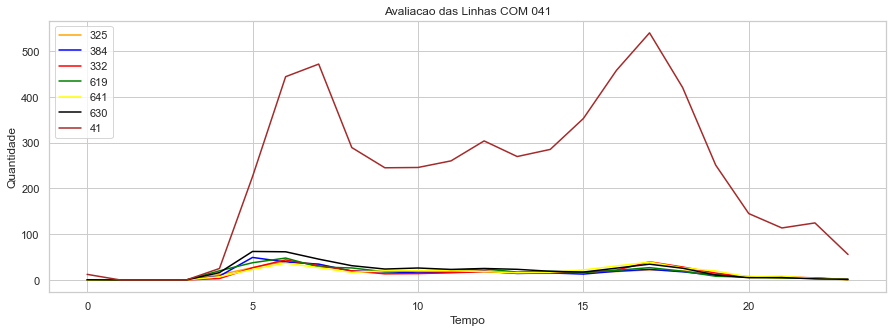

In [12]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 325], ci=None, color='orange', label="325")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 384], ci=None, color='blue', label="384")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 332], ci=None, color='red', label="332")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 619], ci=None, color='green', label="619")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 641], ci=None, color='yellow', label="641")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 630], ci=None, color='black', label="630")
# sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 41], ci=None, color='brown', label="41")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas COM 041")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 325], ci=None, color='orange', label="325")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 384], ci=None, color='blue', label="384")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 332], ci=None, color='red', label="332")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 619], ci=None, color='green', label="619")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 641], ci=None, color='yellow', label="641")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 630], ci=None, color='black', label="630")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 41], ci=None, color='brown', label="41")
plt.legend(loc="upper left")
plt.show()

In [ ]:
for 
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas COM 041")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 325], ci=None, color='orange', label="325")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 384], ci=None, color='blue', label="384")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 332], ci=None, color='red', label="332")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 619], ci=None, color='green', label="619")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 641], ci=None, color='yellow', label="641")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 630], ci=None, color='black', label="630")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 41], ci=None, color='brown', label="41")
plt.legend(loc="upper left")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


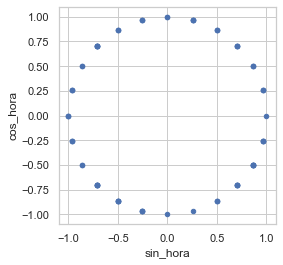

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def rand_times(n):
    """Generate n rows of random 24-hour times (seconds past midnight)"""
    rand_seconds = np.random.randint(0, 24, n)
    return pd.DataFrame(data=dict(seconds=rand_seconds))

n_rows = 1000

df = rand_times(n_rows)
# sort for the sake of graphing
df = df.sort_values('seconds').reset_index(drop=True)
df.head()

seconds_in_day = 24

df['sin_hora'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_hora'] = np.cos(2*np.pi*df.seconds/seconds_in_day)

df.drop('seconds', axis=1, inplace=True)

df.head()

df.sample(80).plot.scatter('sin_hora','cos_hora').set_aspect('equal');


<AxesSubplot:>

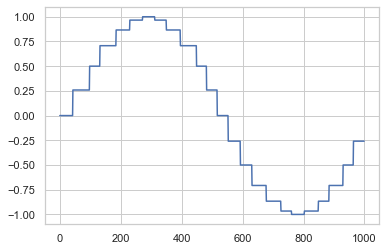

In [14]:
df.sin_hora.plot()

<AxesSubplot:>

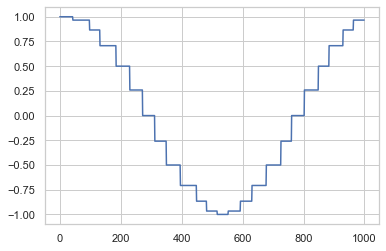

In [15]:
df.cos_hora.plot()

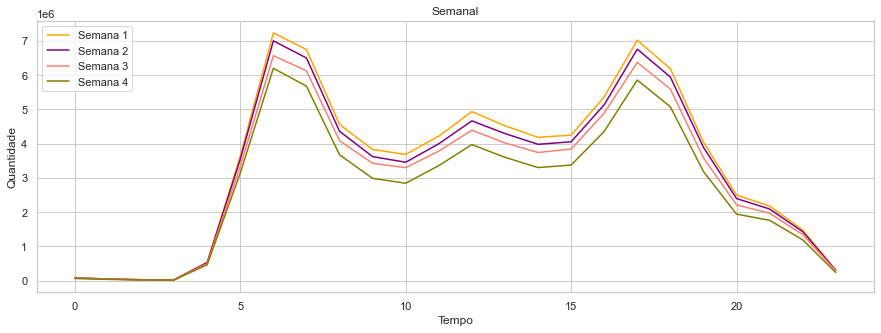

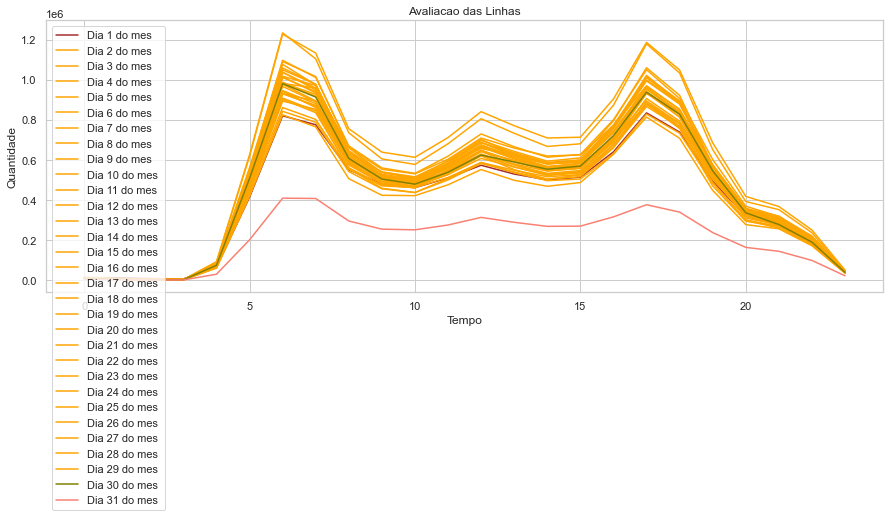

In [70]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Semanal")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.semana_do_mes == 1].groupby([ 'hora']).sum().reset_index(), ci=None, color='orange', label="Semana 1")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.semana_do_mes == 2].groupby([ 'hora']).sum().reset_index(), ci=None, color='purple', label="Semana 2")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.semana_do_mes == 3].groupby([ 'hora']).sum().reset_index(), ci=None, color='salmon', label="Semana 3")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.semana_do_mes == 4].groupby([ 'hora']).sum().reset_index(), ci=None, color='olive', label="Semana 4")
plt.legend(loc="upper left")
plt.savefig('./images/sazonalidade_semanas.pdf')
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.d_mes == 1].groupby([ 'hora']).sum().reset_index(), ci=None, color='brown', label=f"Dia 1 do mes ")
for i in range(2, 30):
    sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.d_mes == i].groupby([ 'hora']).sum().reset_index(), ci=None, color='orange', label=f"Dia {i} do mes ")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.d_mes == 30].groupby([ 'hora']).sum().reset_index(), ci=None, color='olive', label=f"Dia 30 do mes ")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.d_mes == 31].groupby([ 'hora']).sum().reset_index(), ci=None, color='salmon', label=f"Dia 31 do mes ")
plt.legend(loc="upper left")
plt.show()

No handles with labels found to put in legend.


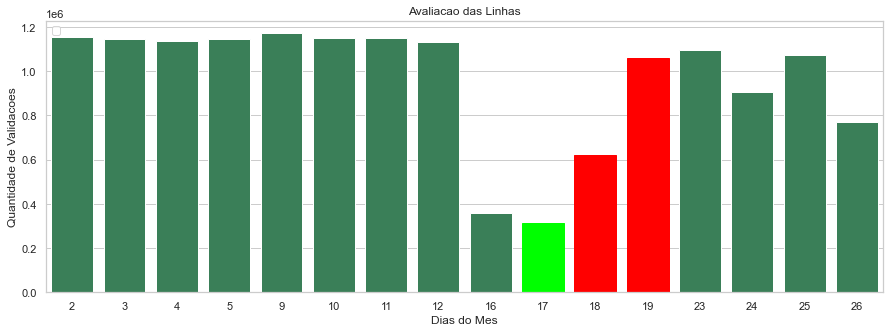

In [72]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='d_mes', y='validations_per_hour', data=data_2015[data_2015.mes == 2].loc[data_2015.d_semana.isin([0, 1, 2, 3])].groupby([ 'd_mes']).sum().reset_index(), ci=None, color='seagreen')
ax.set(xlabel='Dia da semana (Seg / Ter / Qua / Quin)', ylabel='Quantidade de Validacoes')
for bar in ax.patches:
    if bar.get_x() == 9.6 or bar.get_x() == 10.6:
        bar.set_color('red')
    if bar.get_x() == 8.6:
        bar.set_color('lime')
plt.xlabel('Dias do Mes')
plt.ylabel('Quantidade de Validacoes')
plt.title("Avaliacao das Linhas")
plt.savefig('./images/2015/fevereiro_carnaval_2018.pdf')

plt.legend(loc="upper left")
plt.show()

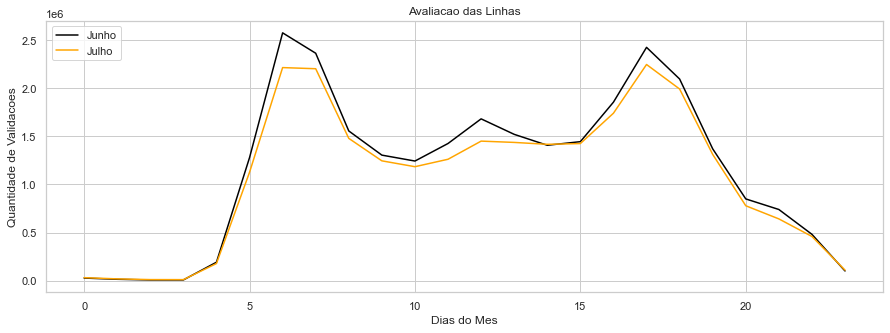

In [73]:
plt.figure(figsize=(15,5))
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.mes == 6].groupby([ 'hora']).sum().reset_index(), ci=None, color='black', label=f"Junho")
sns.lineplot(x='hora', y='validations_per_hour', data=data_2015[data_2015.mes == 7].groupby([ 'hora']).sum().reset_index(), ci=None, color='orange', label=f"Julho")
plt.xlabel('Dias do Mes')
plt.ylabel('Quantidade de Validacoes')
plt.title("Avaliacao das Linhas")
plt.savefig('./images/2018/junho_julho_2018_comp.pdf')
plt.legend(loc="upper left")
plt.show()
